In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d mdhasanahmad/diseaseclassifier-money-plant-dataset

Dataset URL: https://www.kaggle.com/datasets/mdhasanahmad/diseaseclassifier-money-plant-dataset
License(s): CC0-1.0
 99% 118M/119M [00:07<00:00, 23.6MB/s]
100% 119M/119M [00:07<00:00, 17.1MB/s]


In [ ]:
import zipfile
import os

# Path ke file ZIP yang diunduh
zip_file_path = 'diseaseclassifier-money-plant-dataset.zip'

# Direktori untuk mengekstrak file
extract_dir = 'dataset/'

# Mengekstrak file ZIP
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Dataset berhasil diekstrak ke: {extract_dir}")

Dataset berhasil diekstrak ke: dataset/


In [ ]:
import os

dataset_dir = '/content/dataset/Main Dataset'

# Menghitung jumlah gambar per kelas
class_counts = {}
for subdir, dirs, files in os.walk(dataset_dir):
    # Menyaring subdirektori yang bukan folder utama
    if subdir != dataset_dir:
        class_name = subdir.split('/')[-1]  # Mengambil nama kelas
        class_counts[class_name] = len(files)

print("Jumlah gambar per kelas:", class_counts)

Jumlah gambar per kelas: {'Bacterial wilt disease': 5000, 'Healthy': 5000, 'Manganese Toxicity': 5000}


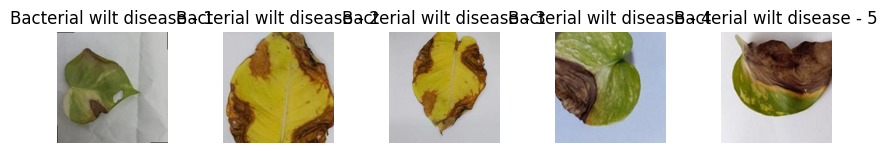

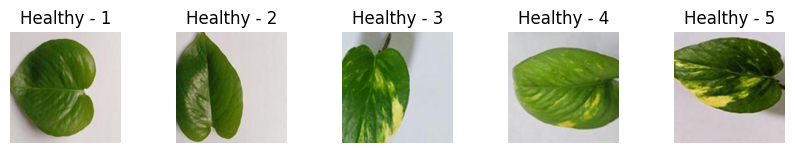

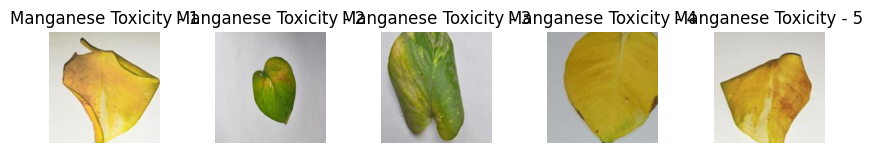

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Menampilkan beberapa gambar acak dari setiap kelas dengan nomor urut
def plot_sample_images():
    for class_name in class_counts.keys():
        class_dir = os.path.join(dataset_dir, class_name)
        files = os.listdir(class_dir)
        random_images = random.sample(files, 5)

        plt.figure(figsize=(10, 10))
        for i, img_file in enumerate(random_images):
            img_path = os.path.join(class_dir, img_file)
            img = mpimg.imread(img_path)
            plt.subplot(1, 5, i+1)
            plt.imshow(img)
            plt.title(f'{class_name} - {i+1}')
            plt.axis('off')
        plt.subplots_adjust(wspace=0.5, hspace=0.5)
        plt.show()

plot_sample_images()

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Tentukan direktori dataset awal dan lokasi tujuan
source_dir = '/content/dataset/Main Dataset'  # Ganti dengan lokasi dataset asli
splitted_data_dir = '/content/dataset/Main Dataset/splitted_data'

# Subfolder untuk kategori
categories = ['Bacterial wilt disease', 'Healthy', 'Manganese Toxicity']

# Buat folder output jika belum ada
os.makedirs(os.path.join(splitted_data_dir, 'train'), exist_ok=True)
os.makedirs(os.path.join(splitted_data_dir, 'val'), exist_ok=True)
os.makedirs(os.path.join(splitted_data_dir, 'test'), exist_ok=True)

for category in categories:
    # Buat subfolder untuk kategori
    os.makedirs(os.path.join(splitted_data_dir, 'train', category), exist_ok=True)
    os.makedirs(os.path.join(splitted_data_dir, 'val', category), exist_ok=True)
    os.makedirs(os.path.join(splitted_data_dir, 'test', category), exist_ok=True)

    # Dapatkan semua file gambar dalam kategori
    category_folder = os.path.join(source_dir, category)
    all_files = os.listdir(category_folder)

    # Split data menjadi train, val, dan test (80% train, 10% val, 10% test)
    train_files, temp_files = train_test_split(all_files, test_size=0.2, random_state=42)
    val_files, test_files = train_test_split(temp_files, test_size=0.5, random_state=42)

    # Pindahkan file ke folder yang sesuai
    for file in train_files:
        shutil.copy(os.path.join(category_folder, file), os.path.join(splitted_data_dir, 'train', category, file))

    for file in val_files:
        shutil.copy(os.path.join(category_folder, file), os.path.join(splitted_data_dir, 'val', category, file))

    for file in test_files:
        shutil.copy(os.path.join(category_folder, file), os.path.join(splitted_data_dir, 'test', category, file))

print("Dataset berhasil dibagi")

Dataset berhasil dibagi


In [ ]:
# Perhitungan distribusi jumlah file di masing-masing folder
def count_files_in_directory(directory):
    total_files = 0
    for root, dirs, files in os.walk(directory):
        total_files += len(files)
    return total_files

# Menyimpan distribusi data untuk digunakan dalam bar chart
data_distribution = {'train': [], 'val': [], 'test': []}

for split in ['train', 'val', 'test']:
    for category in categories:
        folder_path = os.path.join(splitted_data_dir, split, category)
        num_files = count_files_in_directory(folder_path)
        data_distribution[split].append(num_files)

# Menampilkan distribusi jumlah file
print("\nDistribusi jumlah file setelah split:")
for split in ['train', 'val', 'test']:
    print(f"\nDistribusi untuk folder {split}:")
    for category, num_files in zip(categories, data_distribution[split]):
        print(f"{category}: {num_files} files")


Distribusi jumlah file setelah split:

Distribusi untuk folder train:
Bacterial wilt disease: 4000 files
Healthy: 4000 files
Manganese Toxicity: 4000 files

Distribusi untuk folder val:
Bacterial wilt disease: 500 files
Healthy: 500 files
Manganese Toxicity: 500 files

Distribusi untuk folder test:
Bacterial wilt disease: 500 files
Healthy: 500 files
Manganese Toxicity: 500 files


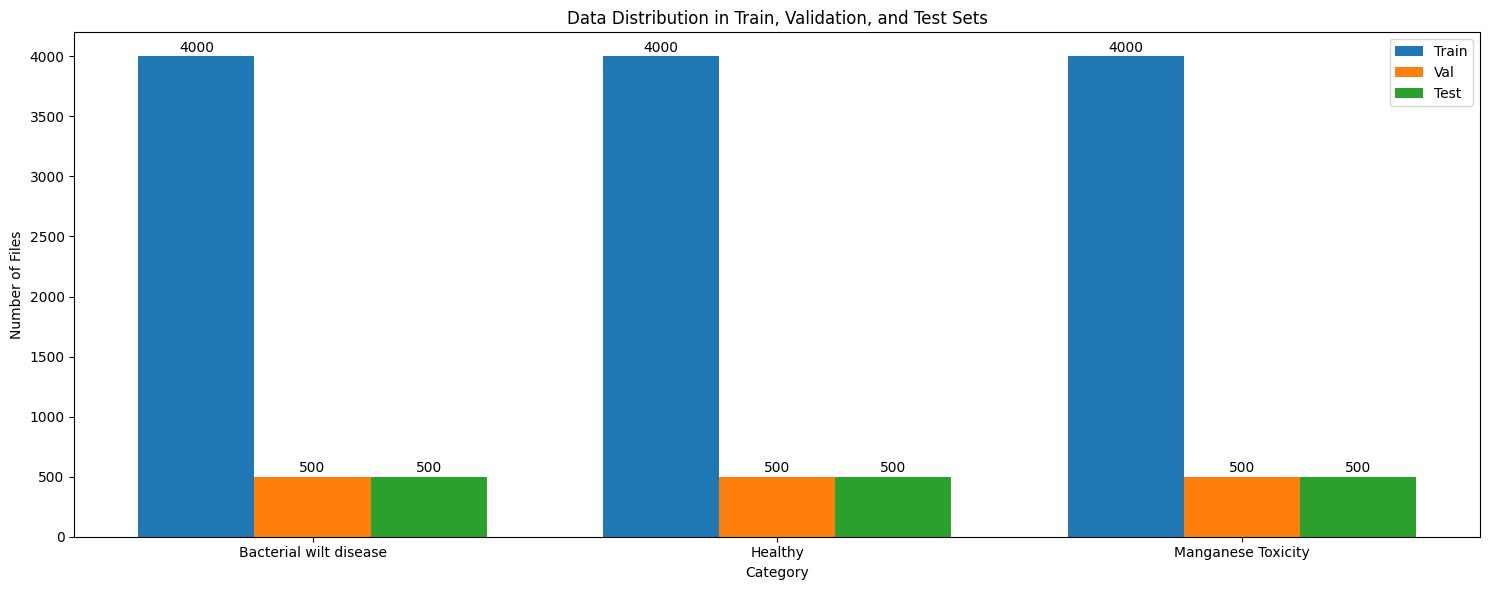

In [ ]:
# Membuat bar chart untuk distribusi data
fig, ax = plt.subplots(figsize=(15, 6))

bar_width = 0.25
index = range(len(categories))

# Membuat bar untuk setiap kategori dalam masing-masing split
bar1 = ax.bar([i - bar_width for i in index], data_distribution['train'], bar_width, label='Train')
bar2 = ax.bar(index, data_distribution['val'], bar_width, label='Val')
bar3 = ax.bar([i + bar_width for i in index], data_distribution['test'], bar_width, label='Test')

# Menambahkan angka di atas setiap bar
def add_values(bars):
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 10, int(yval), ha='center', va='bottom', fontsize=10)

add_values(bar1)
add_values(bar2)
add_values(bar3)

ax.set_xlabel('Category')
ax.set_ylabel('Number of Files')
ax.set_title('Data Distribution in Train, Validation, and Test Sets')
ax.set_xticks(index)
ax.set_xticklabels(categories)
ax.legend()

plt.tight_layout()
plt.show()

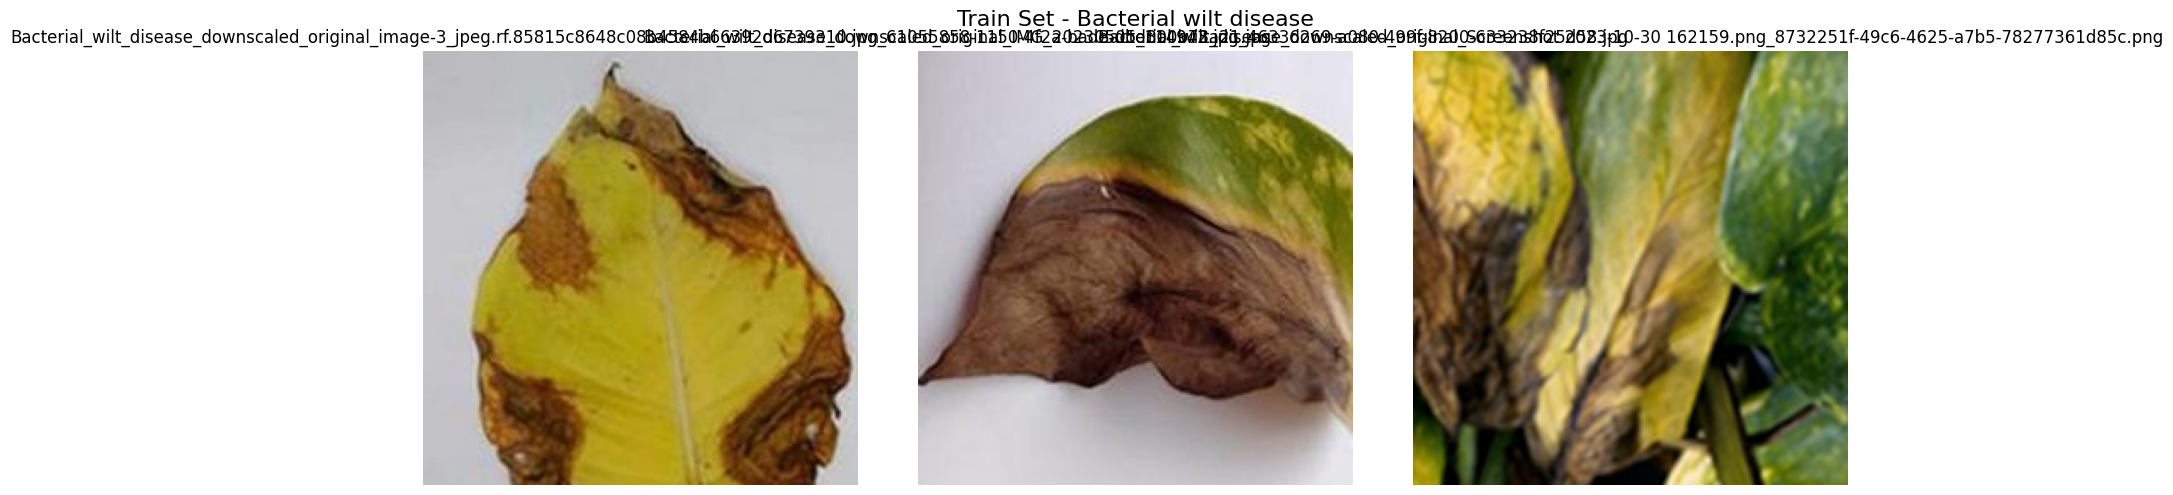

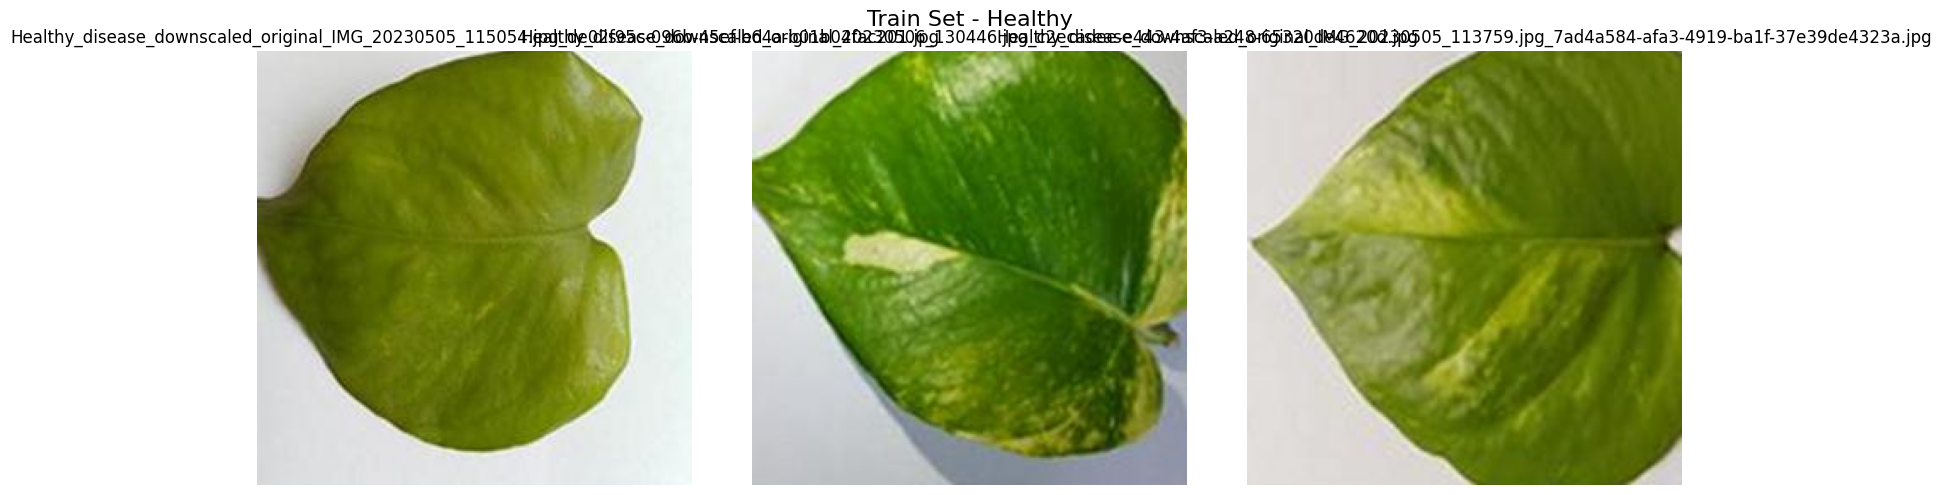

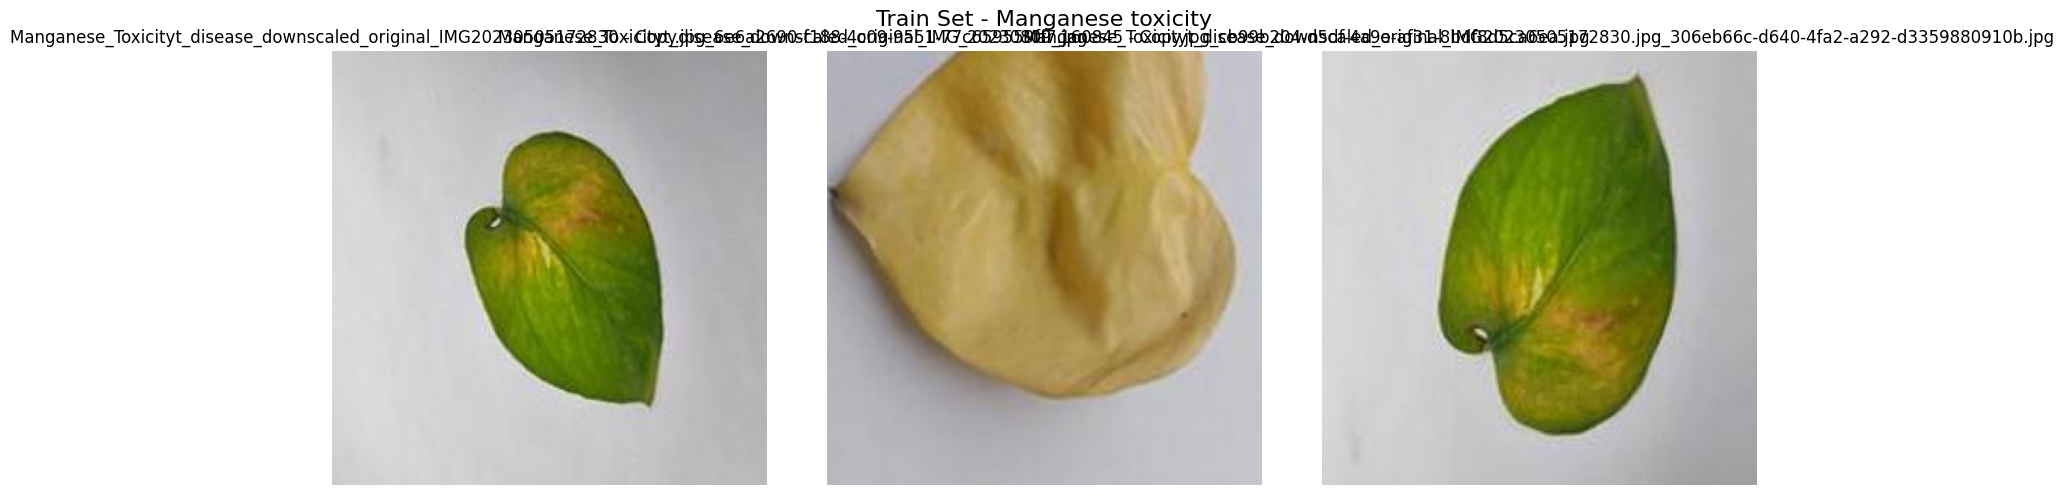

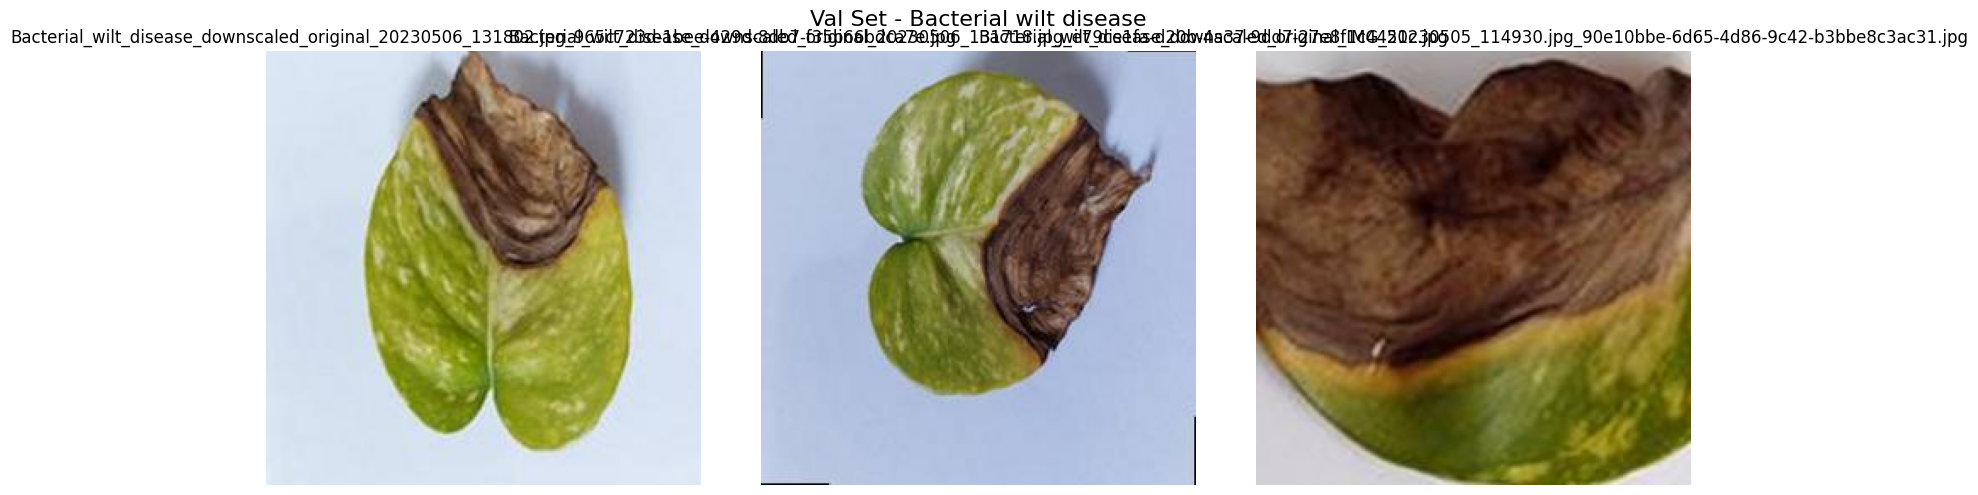

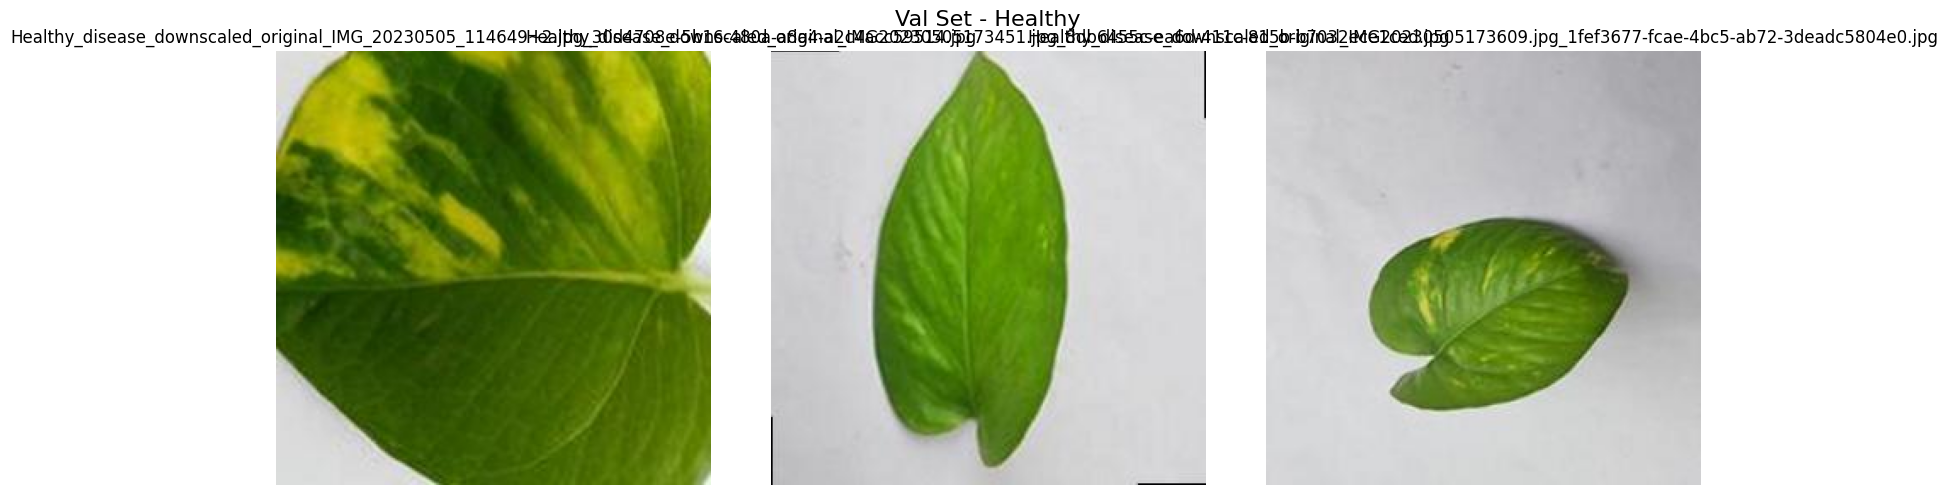

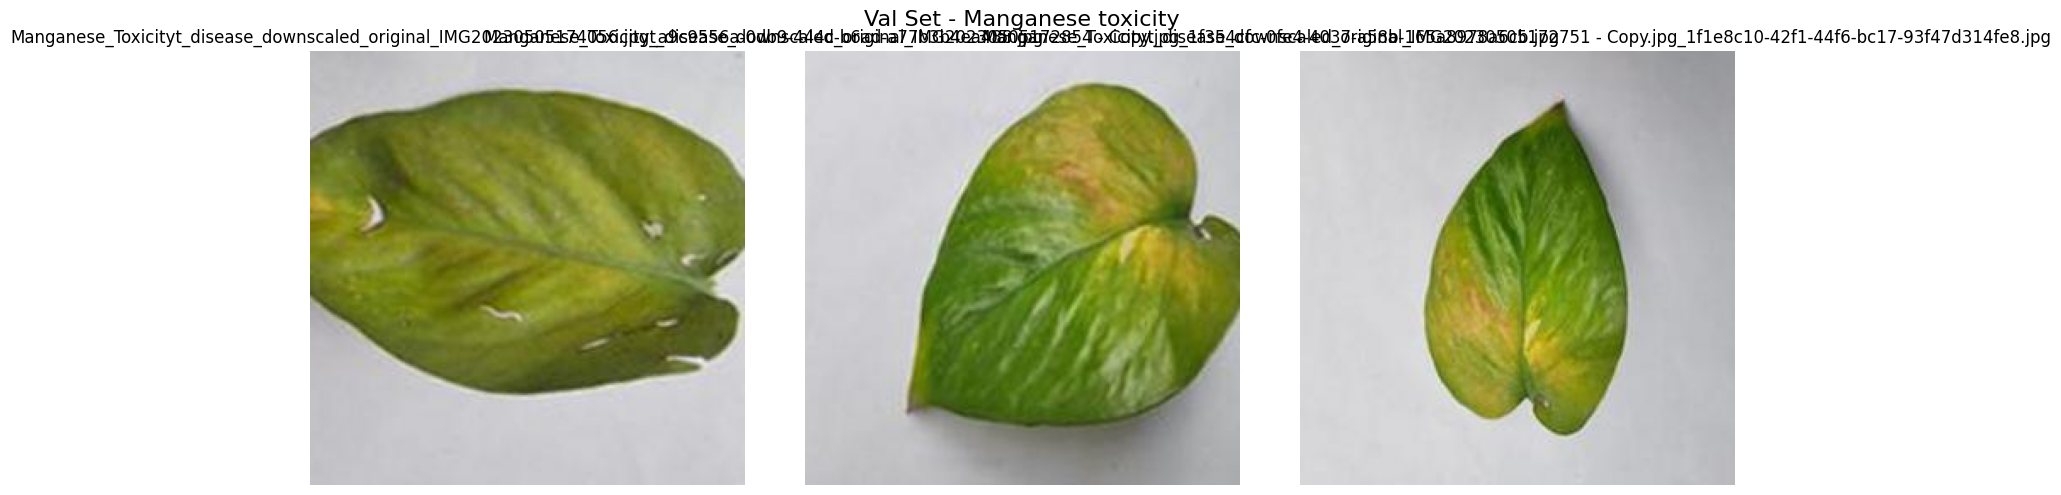

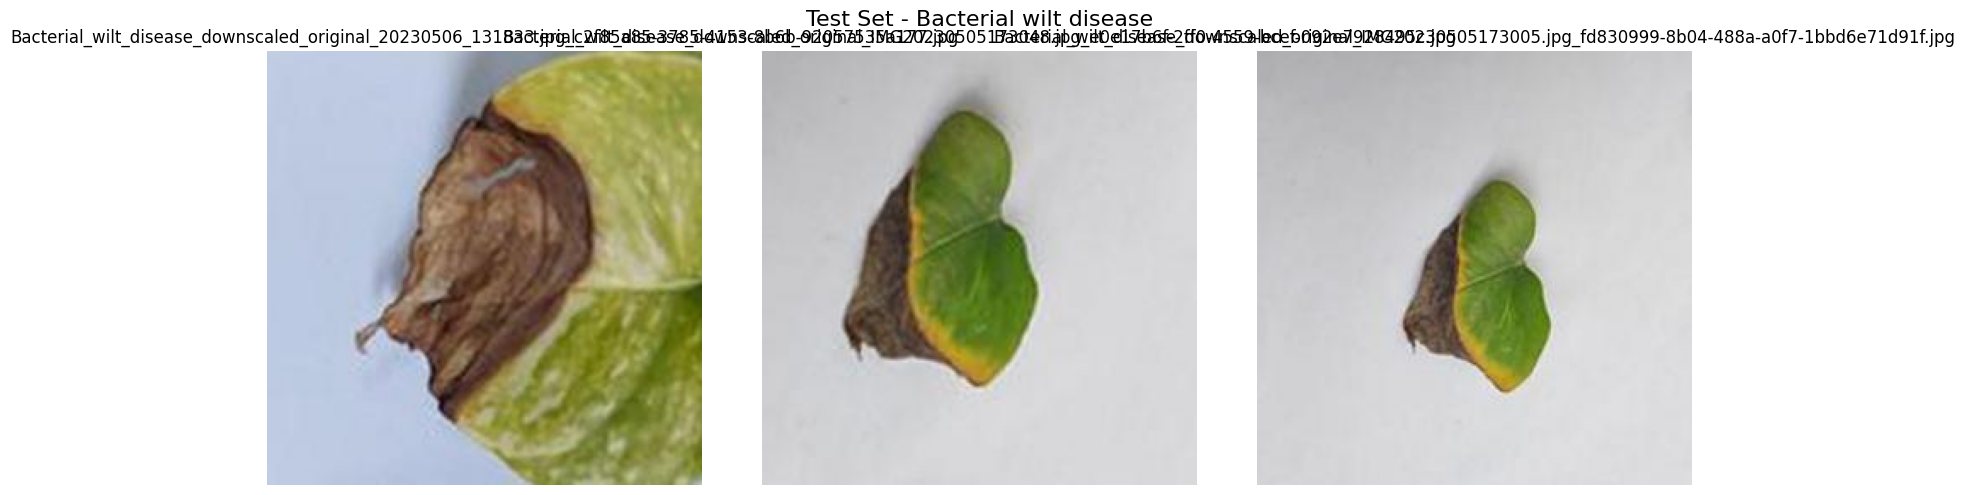

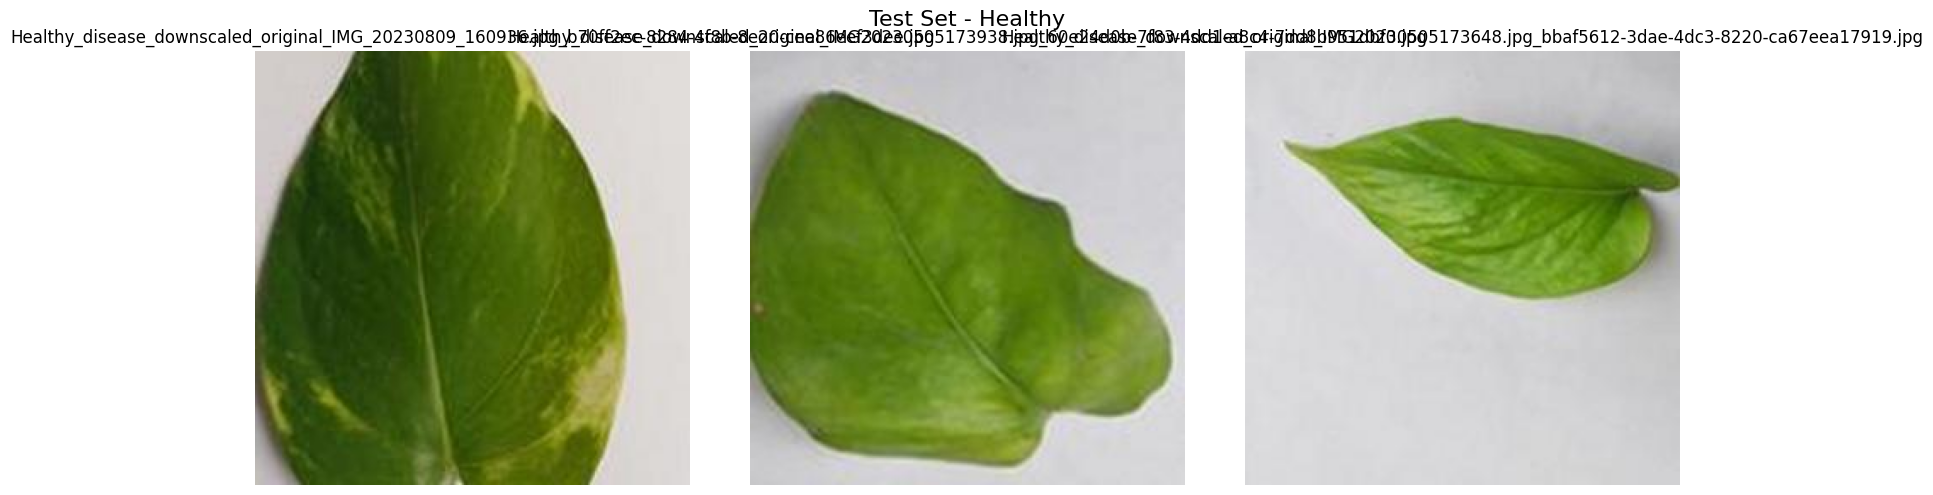

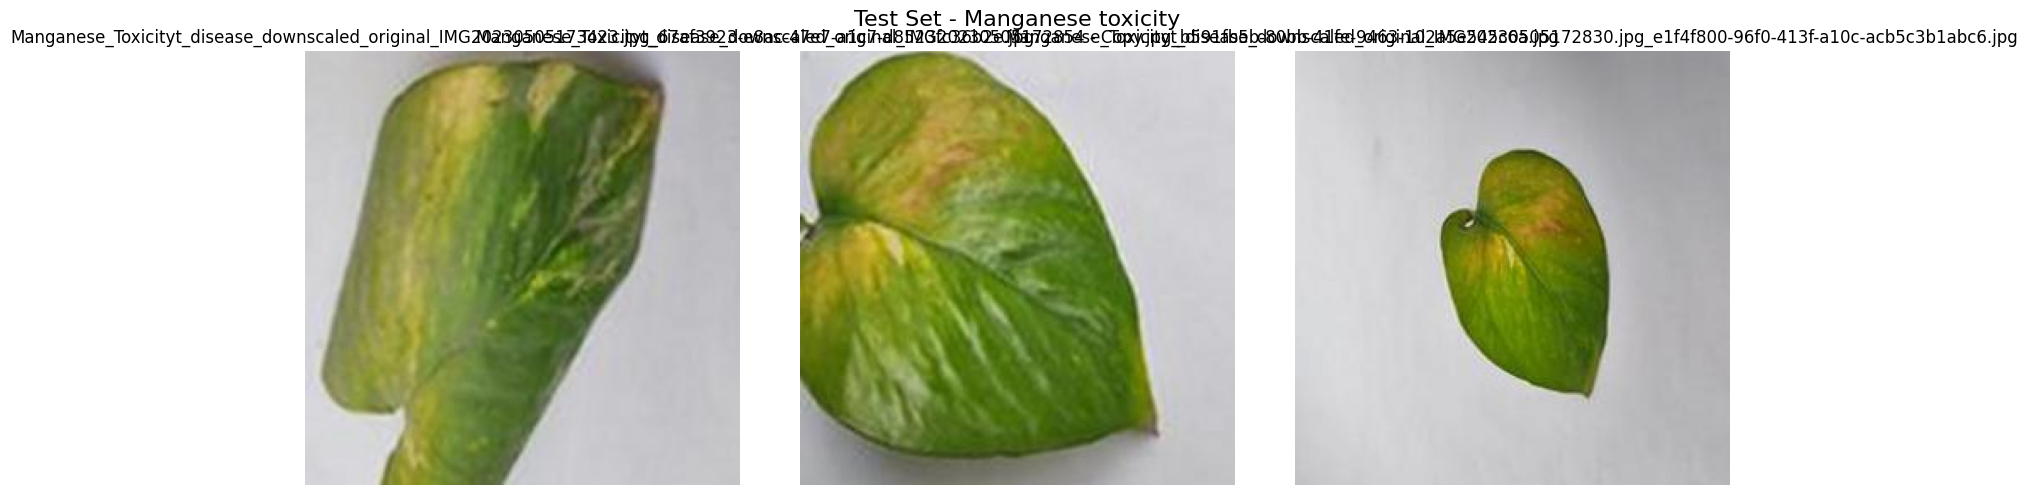

In [ ]:
import random
import matplotlib.image as mpimg

# Fungsi untuk menampilkan beberapa gambar
def show_sample_images(split, category, num_images=3):
    # Ambil folder gambar dari split dan kategori
    folder_path = os.path.join(splitted_data_dir, split, category)
    all_files = os.listdir(folder_path)

    # Pilih beberapa gambar secara acak
    sample_files = random.sample(all_files, num_images)

    # Menampilkan gambar
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    fig.suptitle(f'{split.capitalize()} Set - {category.capitalize()}', fontsize=16)

    for ax, file in zip(axes, sample_files):
        img_path = os.path.join(folder_path, file)
        img = mpimg.imread(img_path)
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(file)

    plt.tight_layout()
    plt.show()

# Menampilkan gambar sampel dari setiap kategori dan split
for split in ['train', 'val', 'test']:
    for category in categories:
        show_sample_images(split, category, num_images=3)  # Menampilkan 3 gambar per kategori

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Tentukan direktori dataset
train_dir = '/content/dataset/Main Dataset/splitted_data/train'
val_dir = '/content/dataset/Main Dataset/splitted_data/val'
test_dir = '/content/dataset/Main Dataset/splitted_data/test'

# Load pretrained VGG19 model tanpa top layers (fully connected)
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers[:-5]:  # Freeze semua kecuali 5 lapisan terakhir
    layer.trainable = False

# Bangun model baru di atas VGG19
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')  # 3 kelas: paper, rock, scissors
])

# Compile model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Ringkasan model
model.summary()

# Data augmentation dan preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Load data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Disesuaikan dengan input shape VGG19
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),  # Disesuaikan dengan input shape VGG19
    batch_size=32,
    class_mode='categorical'
)

# Callback untuk early stopping, checkpoint, dan learning rate scheduler
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('vgg19_model.keras', monitor='val_loss', save_best_only=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

# Melatih model dengan callback tambahan
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[early_stop, checkpoint, lr_reduction]
)

# Evaluasi model pada data test
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),  # Disesuaikan dengan input shape VGG19
    batch_size=32,
    class_mode='categorical'
)

test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc:.4f}")

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)                   │ (None, 7, 7, 512)           │      20,024,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,236,163 (88.64 MB)

 Trainable params: 12,651,011 (48.26 MB)

 Non-trainable params: 10,585,152 (40.38 MB)

Found 12000 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


375/375 ━━━━━━━━━━━━━━━━━━━━ 208s 496ms/step - accuracy: 0.8142 - loss: 1.7771 - val_accuracy: 0.9593 - val_loss: 0.4781 - learning_rate: 1.0000e-04
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 227s 448ms/step - accuracy: 0.9862 - loss: 0.3765 - val_accuracy: 1.0000 - val_loss: 0.1894 - learning_rate: 1.0000e-04
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 199s 442ms/step - accuracy: 0.9969 - loss: 0.1696 - val_accuracy: 1.0000 - val_loss: 0.1017 - learning_rate: 1.0000e-04
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 170s 446ms/step - accuracy: 0.9971 - loss: 0.0959 - val_accuracy: 1.0000 - val_loss: 0.0568 - learning_rate: 1.0000e-04
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 168s 440ms/step - accuracy: 0.9931 - loss: 0.0796 - val_accuracy: 0.9920 - val_loss: 0.0696 - learning_rate: 1.0000e-04
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 171s 450ms/step - accuracy: 0.9952 - loss: 0.0543 - val_accuracy: 1.0000 - val_loss: 0.0272 - learning_rate: 1.0000e-04
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 200s 444ms/

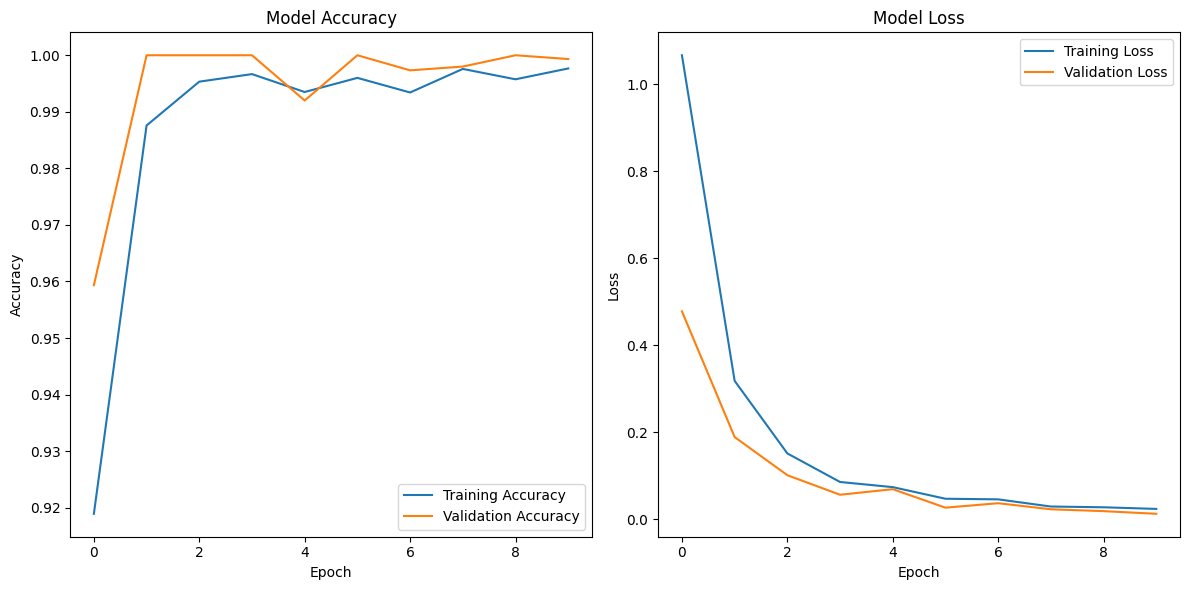

In [ ]:
import matplotlib.pyplot as plt

# Fungsi untuk plot akurasi dan loss
def plot_accuracy_and_loss(history):
    # Plot akurasi
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Panggil fungsi dengan history dari model yang telah dilatih
plot_accuracy_and_loss(history)

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Menyimpan hasil prediksi dan label yang benar
y_true = []
y_pred = []

# Mendapatkan jumlah langkah untuk validasi
steps = val_generator.samples // val_generator.batch_size

# Melakukan prediksi pada data validasi
for i in range(steps):
    images, labels = next(val_generator)  # Mengambil batch berikutnya
    batch_predictions = model.predict(images)
    batch_pred_labels = np.argmax(batch_predictions, axis=1)
    y_true.extend(np.argmax(labels, axis=1))  # Ambil label asli dari one-hot encoding
    y_pred.extend(batch_pred_labels)

# Mengonversi hasil menjadi numpy array
y_true = np.array(y_true)
y_pred = np.array(y_pred)

print(classification_report(y_true, y_pred, target_names=categories))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━

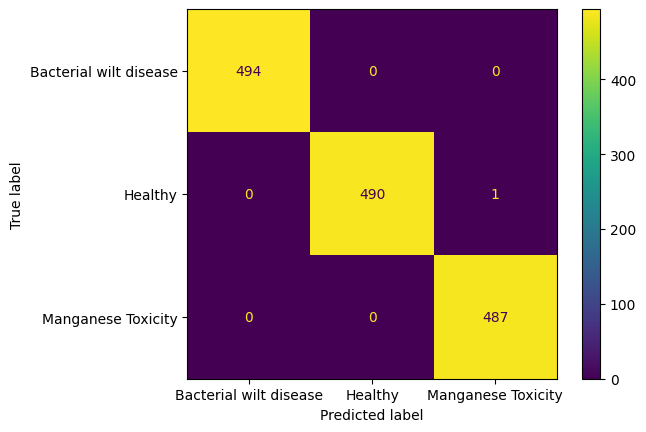

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=categories)
disp.plot()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


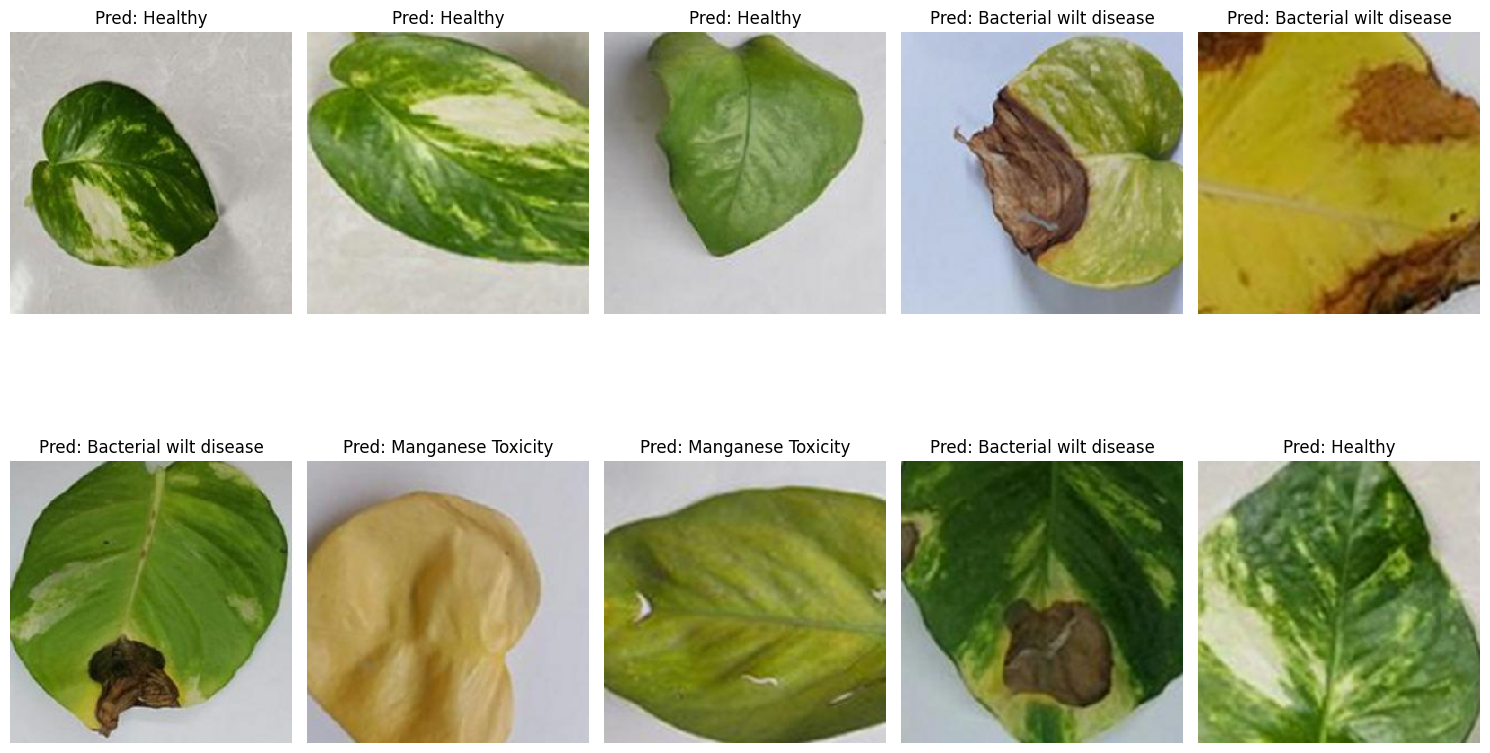

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

# Ambil semua file gambar dari direktori test dan subdirektori
test_images_list = []
for subdir in os.listdir(test_dir):
    subdir_path = os.path.join(test_dir, subdir)
    if os.path.isdir(subdir_path):  # Pastikan ini adalah folder (kelas gambar)
        for fname in os.listdir(subdir_path):
            file_path = os.path.join(subdir_path, fname)
            if os.path.isfile(file_path) and fname.lower().endswith(('.png', '.jpg', '.jpeg')):
                test_images_list.append(file_path)

# Tentukan jumlah gambar yang ingin dipilih, pastikan tidak lebih dari jumlah gambar yang tersedia
num_images_to_select = min(10, len(test_images_list))

# Pilih gambar secara acak
random_images = random.sample(test_images_list, num_images_to_select)

# Tampilkan gambar yang dipilih dan lakukan prediksi
plt.figure(figsize=(15, 10))
for i, img_path in enumerate(random_images):
    # Muat gambar dan ubah ukurannya agar sesuai dengan input model
    img = image.load_img(img_path, target_size=(224, 224))

    # Ubah gambar menjadi array dan normalisasi
    img_array = image.img_to_array(img) / 255.0  # Normalisasi pixel ke rentang [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Menambah dimensi batch

    # Lakukan prediksi dengan model
    pred = model.predict(img_array)

    # Dapatkan kelas dengan probabilitas tertinggi
    predicted_class = np.argmax(pred, axis=1)[0]

    # Dapatkan nama kelas
    class_names = ['Bacterial wilt disease', 'Healthy', 'Manganese Toxicity']  # Sesuaikan dengan kelas yang ada
    predicted_class_name = class_names[predicted_class]

    # Tampilkan gambar dan hasil prediksi
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Pred: {predicted_class_name}")

plt.tight_layout()
plt.show()